YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  50 of 50 completed



Median Cumulative Return (2012–2022) for Consumer Discretionary Stocks: 420.21%
Number of Consumer Discretionary Stocks with Data: 50


<ipython-input-1-a0a2fd925b7d>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, ax=ax2, palette="Blues_r")


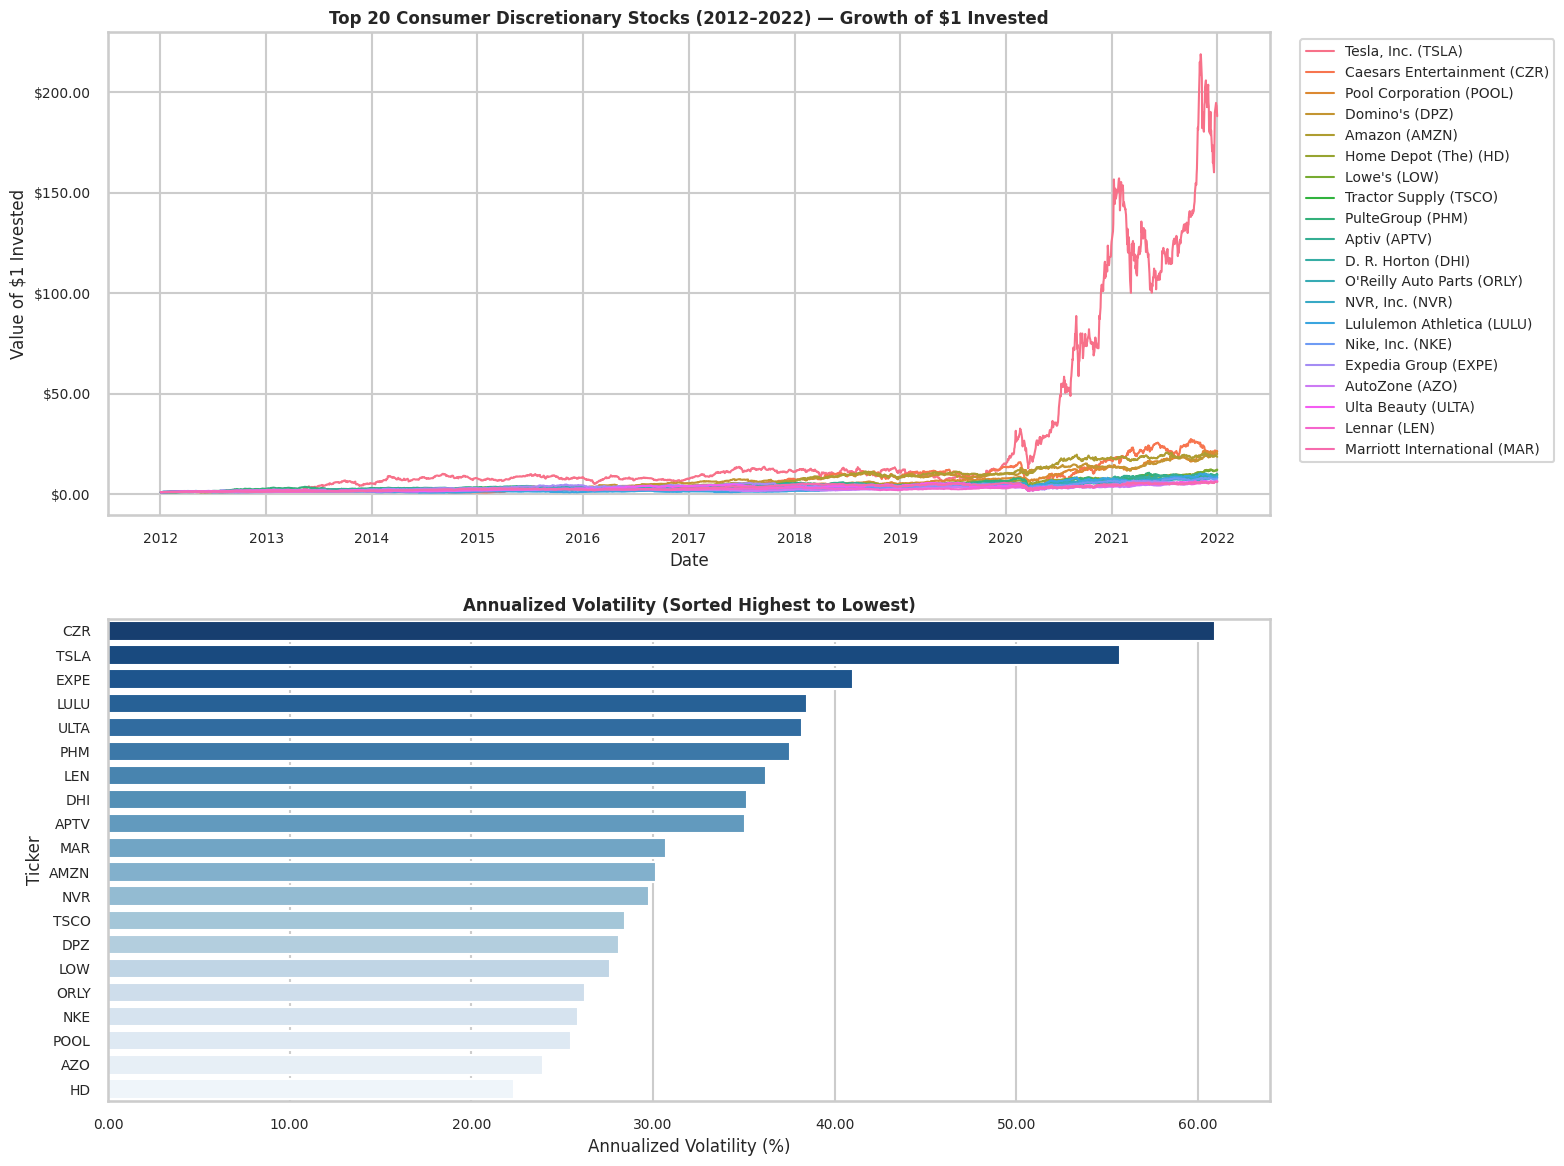

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mtick
import matplotlib as mpl

# 1. Font & styling (universal settings)
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12
sns.set_theme(style="whitegrid", context="talk")

# 2. Fetch S&P 500 Consumer Discretionary tickers
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500 = pd.read_html(url, header=0)[0]
cd_stocks = sp500[sp500['GICS Sector'] == 'Consumer Discretionary']
tickers = cd_stocks['Symbol'].tolist()
name_map = dict(zip(cd_stocks['Symbol'], cd_stocks['Security']))

# 3. Date range & data download (10-year analysis: 2012-2022)
start_date = datetime(2012, 1, 1)
end_date   = datetime(2022, 1, 1)
df_full = yf.download(tickers, start=start_date, end=end_date)

if "Adj Close" in df_full.columns.levels[0]:
    df_prices = df_full["Adj Close"]
else:
    df_prices = df_full["Close"]

# 4. Compute final return & annualized volatility
stats = {}
for ticker in df_prices.columns:
    series = df_prices[ticker].dropna()
    if len(series) < 2:
        continue

    final_return = (series.iloc[-1] / series.iloc[0]) - 1
    daily_ret = series.pct_change().dropna()
    if len(daily_ret) == 0:
        continue

    ann_vol = daily_ret.std() * np.sqrt(252)
    stats[ticker] = {"final_return": final_return, "annualized_vol": ann_vol}

stats_df = pd.DataFrame.from_dict(stats, orient='index')
stats_df.index.name = "Ticker"

# Print overall median
all_median = stats_df["final_return"].median()
print(f"\nMedian Cumulative Return (2012–2022) for Consumer Discretionary Stocks: {all_median:.2%}")
print(f"Number of Consumer Discretionary Stocks with Data: {len(stats_df)}")

# 5. Top 20 by final return
stats_df.sort_values("final_return", ascending=False, inplace=True)
top_20 = stats_df.head(20)

# 6. Build '$1 invested' DataFrame
df_value = pd.DataFrame(index=df_prices.index)
for ticker in top_20.index:
    s = df_prices[ticker].dropna()
    if len(s) >= 2:
        df_value[ticker] = s / s.iloc[0]
df_value.dropna(how='all', inplace=True)

# 7. Subplots: Growth of $1 & Volatility
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# --- TOP SUBPLOT: Growth of $1 Invested ---
colors = sns.color_palette("husl", n_colors=len(df_value.columns))
for i, ticker in enumerate(df_value.columns):
    label = f"{name_map.get(ticker, 'Unknown')} ({ticker})"
    ax1.plot(df_value.index, df_value[ticker], label=label, linewidth=1.5, color=colors[i])

ax1.set_title("Top 20 Consumer Discretionary Stocks (2012–2022) — Growth of $1 Invested", fontsize=12, fontweight='bold')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Value of $1 Invested", fontsize=12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

# --- BOTTOM SUBPLOT: Annualized Volatility ---
top_20_sorted_vol = top_20.sort_values("annualized_vol", ascending=False)
x = top_20_sorted_vol.index
y = top_20_sorted_vol["annualized_vol"] * 100  # convert to percentage
sns.barplot(x=y, y=x, ax=ax2, palette="Blues_r")
ax2.set_title("Annualized Volatility (Sorted Highest to Lowest)", fontsize=12, fontweight='bold')
ax2.set_xlabel("Annualized Volatility (%)", fontsize=12)
ax2.set_ylabel("Ticker", fontsize=12)
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#10 year
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# 1. Get S&P 500 companies from Wikipedia and filter for the Consumer Discretionary sector
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]
cd_df = sp500_table[sp500_table['GICS Sector'] == 'Consumer Discretionary']
cd_tickers = cd_df['Symbol'].tolist()
# Adjust tickers for yfinance formatting (e.g., "BRK.B" -> "BRK-B")
cd_tickers = [ticker.replace('.', '-') for ticker in cd_tickers]

# 2. Define the date range (2012-2022) and download data for Consumer Discretionary tickers
start_date = "2012-01-01"
end_date = "2022-01-01"
data = yf.download(cd_tickers, start=start_date, end=end_date, progress=False)

# 3. Calculate cumulative return and annualized volatility for each ticker
results = []
for ticker in cd_tickers:
    try:
        if ticker not in data['Close'].columns:
            print(f"{ticker} not found in data['Close'] columns")
            continue

        series = data['Close'][ticker].dropna()
        if series.empty:
            continue

        # Cumulative return: (final price / initial price) - 1
        cum_return = (series.iloc[-1] / series.iloc[0]) - 1

        # Daily returns and annualized volatility (std dev * sqrt(252 trading days))
        daily_returns = series.pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252)

        # Compute a simple return-to-risk ratio (higher is better)
        ratio = cum_return / volatility if volatility != 0 else np.nan

        results.append({
            'Ticker': ticker,
            'Cumulative Return': cum_return,
            'Volatility': volatility,
            'Return-to-Risk': ratio
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

_results_10y = pd.DataFrame(results)


ERROR:yfinance:Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LEN']: YFTzMissingError('possibly delisted; no timezone found')


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# 1. Get S&P 500 companies from Wikipedia and filter for the Consumer Discretionary sector
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]
cd_df = sp500_table[sp500_table['GICS Sector'] == 'Consumer Discretionary']
cd_tickers = cd_df['Symbol'].tolist()
cd_tickers = [ticker.replace('.', '-') for ticker in cd_tickers]

# 2. Define the 5-year date range (2017-2022) and download data for Consumer Discretionary tickers
start_date = "2017-01-01"
end_date = "2022-01-01"
data = yf.download(cd_tickers, start=start_date, end=end_date, progress=False)

# 3. Calculate cumulative return and annualized volatility for each ticker
results_5y = []
for ticker in cd_tickers:
    try:
        if ticker not in data['Close'].columns:
            print(f"{ticker} not found in data['Close'] columns")
            continue

        series = data['Close'][ticker].dropna()
        if series.empty:
            continue

        # Cumulative return over 5 years
        cum_return = (series.iloc[-1] / series.iloc[0]) - 1

        # Annualized volatility (daily returns * sqrt(252 trading days))
        daily_returns = series.pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252)

        # Return-to-Risk ratio
        ratio = np.nan if volatility == 0 else (cum_return / volatility)

        results_5y.append({
            'Ticker': ticker,
            'Cumulative Return': cum_return,
            'Volatility': volatility,
            'Return-to-Risk': ratio
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

_results_5y = pd.DataFrame(results_5y)


ERROR:yfinance:Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LEN']: YFTzMissingError('possibly delisted; no timezone found')


In [ ]:
# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# 1. Get S&P 500 companies from Wikipedia and filter for the Consumer Discretionary sector
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]
cd_df = sp500_table[sp500_table['GICS Sector'] == 'Consumer Discretionary']
cd_tickers = cd_df['Symbol'].tolist()
cd_tickers = [ticker.replace('.', '-') for ticker in cd_tickers]

# 2. Define the date range (3 years: 2019-2022) and download data for Consumer Discretionary tickers
start_date = "2019-01-01"
end_date = "2022-01-01"
data = yf.download(cd_tickers, start=start_date, end=end_date, progress=False)

# 3. Calculate cumulative return and annualized volatility for each ticker
results_3y = []
for ticker in cd_tickers:
    try:
        if ticker not in data['Close'].columns:
            print(f"{ticker} not found in data['Close'] columns")
            continue

        series = data['Close'][ticker].dropna()
        if series.empty:
            continue

        # Cumulative return: (final price / initial price) - 1
        cum_return = (series.iloc[-1] / series.iloc[0]) - 1

        # Daily returns and annualized volatility (std dev * sqrt(252))
        daily_returns = series.pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252)

        # Return-to-Risk ratio
        ratio = np.nan if volatility == 0 else (cum_return / volatility)

        results_3y.append({
            'Ticker': ticker,
            'Cumulative Return': cum_return,
            'Volatility': volatility,
            'Return-to-Risk': ratio
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

_results_3y = pd.DataFrame(results_3y)


ERROR:yfinance:Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LEN']: YFTzMissingError('possibly delisted; no timezone found')


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# 1. Get S&P 500 companies from Wikipedia and filter for the Consumer Discretionary sector
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]
cd_df = sp500_table[sp500_table['GICS Sector'] == 'Consumer Discretionary']
cd_tickers = cd_df['Symbol'].tolist()
cd_tickers = [ticker.replace('.', '-') for ticker in cd_tickers]

# 2. Define the 1-year date range (2021-2022) and download data for Consumer Discretionary tickers
start_date = "2021-01-01"
end_date = "2022-01-01"
data = yf.download(cd_tickers, start=start_date, end=end_date, progress=False)

# 3. Calculate cumulative return and annualized volatility for each ticker
results_1y = []
for ticker in cd_tickers:
    try:
        if ticker not in data['Close'].columns:
            print(f"{ticker} not found in data['Close'] columns")
            continue

        series = data['Close'][ticker].dropna()
        if series.empty:
            continue

        # Cumulative return: (final price / initial price) - 1
        cum_return = (series.iloc[-1] / series.iloc[0]) - 1

        # Daily returns and annualized volatility (std dev * sqrt(252 trading days))
        daily_returns = series.pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252)

        # Return-to-Risk ratio (higher is better)
        ratio = np.nan if volatility == 0 else (cum_return / volatility)

        results_1y.append({
            'Ticker': ticker,
            'Cumulative Return': cum_return,
            'Volatility': volatility,
            'Return-to-Risk': ratio
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

_results_1y = pd.DataFrame(results_1y)


ERROR:yfinance:Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LEN']: YFTzMissingError('possibly delisted; no timezone found')


In [ ]:
# Rename columns for clarity
_results_10y = _results_10y.rename(columns={
    "Cumulative Return": "CumulativeReturn_10y",
    "Volatility": "Volatility_10y",
    "Return-to-Risk": "ReturnToRisk_10y"
})

_results_5y = _results_5y.rename(columns={
    "Cumulative Return": "CumulativeReturn_5y",
    "Volatility": "Volatility_5y",
    "Return-to-Risk": "ReturnToRisk_5y"
})

_results_3y = _results_3y.rename(columns={
    "Cumulative Return": "CumulativeReturn_3y",
    "Volatility": "Volatility_3y",
    "Return-to-Risk": "ReturnToRisk_3y"
})

_results_1y = _results_1y.rename(columns={
    "Cumulative Return": "CumulativeReturn_1y",
    "Volatility": "Volatility_1y",
    "Return-to-Risk": "ReturnToRisk_1y"
})


df_10y = _results_10y[["Ticker","CumulativeReturn_10y","Volatility_10y","ReturnToRisk_10y"]]
df_5y  = _results_5y[ ["Ticker","CumulativeReturn_5y","Volatility_5y","ReturnToRisk_5y"]]
df_3y  = _results_3y[ ["Ticker","CumulativeReturn_3y","Volatility_3y","ReturnToRisk_3y"]]
df_1y  = _results_1y[ ["Ticker","CumulativeReturn_1y","Volatility_1y","ReturnToRisk_1y"]]

merged_df = (
    df_10y.merge(df_5y, on="Ticker", how="inner")
          .merge(df_3y, on="Ticker", how="inner")
          .merge(df_1y, on="Ticker", how="inner")
)

print("Merged shape:", merged_df.shape)
print(merged_df.head())



Merged shape: (49, 13)
  Ticker  CumulativeReturn_10y  Volatility_10y  ReturnToRisk_10y  \
0   ABNB              0.150508        0.547263          0.275019   
1   AMZN             17.624476        0.301910         58.376679   
2   APTV              8.682404        0.350898         24.743363   
3    AZO              5.555520        0.239575         23.189095   
4    BBY              4.783105        0.404442         11.826417   

   CumulativeReturn_5y  Volatility_5y  ReturnToRisk_5y  CumulativeReturn_3y  \
0             0.150508       0.547263         0.275019             0.150508   
1             3.424138       0.294334        11.633526             1.166380   
2             2.006232       0.416135         4.821112             1.733119   
3             1.648763       0.287061         5.743605             1.500227   
4             1.707458       0.383246         4.455251             1.053530   

   Volatility_3y  ReturnToRisk_3y  CumulativeReturn_1y  Volatility_1y  \
0       0.547263    

In [ ]:
import numpy as np

# List out the columns for each metric type
cumret_cols = ["CumulativeReturn_10y","CumulativeReturn_5y","CumulativeReturn_3y","CumulativeReturn_1y"]
vol_cols    = ["Volatility_10y","Volatility_5y","Volatility_3y","Volatility_1y"]
rtr_cols    = ["ReturnToRisk_10y","ReturnToRisk_5y","ReturnToRisk_3y","ReturnToRisk_1y"]

def zscore(series):
    return (series - series.mean()) / series.std(ddof=0)

# We'll create new columns with z_ prefix
for col in cumret_cols + vol_cols + rtr_cols:
    if merged_df[col].std(ddof=0) == 0:
        # Handle edge case if a column has zero std
        merged_df["z_"+col] = 0
    else:
        merged_df["z_"+col] = zscore(merged_df[col])

# Invert volatility z-scores so that lower vol => higher is better
for col in vol_cols:
    merged_df["z_"+col] = -1.0 * merged_df["z_"+col]

metric_weights = {
    "CumulativeReturn": 0.4,  # 40%
    "Volatility":       0.3,  # 30%
    "ReturnToRisk":     0.3   # 30%
}

time_weights = {
    "10y": 0.4,
    "5y":  0.3,
    "3y":  0.2,
    "1y":  0.1
}

def compute_score(row):
    score = 0.0

    # For each time frame
    for tf in ["10y","5y","3y","1y"]:
        # Weighted sum of the three metrics in that time frame
        cr_col  = f"z_CumulativeReturn_{tf}"
        vol_col = f"z_Volatility_{tf}"
        rtr_col = f"z_ReturnToRisk_{tf}"

        # Sum for this time frame
        tf_sum = (metric_weights["CumulativeReturn"] * row[cr_col]
                  + metric_weights["Volatility"]       * row[vol_col]
                  + metric_weights["ReturnToRisk"]     * row[rtr_col])

        # Multiply by the time frame's weight
        score += time_weights[tf] * tf_sum

    return score

merged_df["FinalScore"] = merged_df.apply(compute_score, axis=1)

# Sort descending by FinalScore
merged_df.sort_values("FinalScore", ascending=False, inplace=True)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
import optuna

# 1) Rename columns in each DataFrame for clarity
_results_10y = _results_10y.rename(columns={
    "Cumulative Return": "CumulativeReturn_10y",
    "Volatility": "Volatility_10y",
    "Return-to-Risk": "ReturnToRisk_10y"
})
_results_5y = _results_5y.rename(columns={
    "Cumulative Return": "CumulativeReturn_5y",
    "Volatility": "Volatility_5y",
    "Return-to-Risk": "ReturnToRisk_5y"
})
_results_3y = _results_3y.rename(columns={
    "Cumulative Return": "CumulativeReturn_3y",
    "Volatility": "Volatility_3y",
    "Return-to-Risk": "ReturnToRisk_3y"
})
_results_1y = _results_1y.rename(columns={
    "Cumulative Return": "CumulativeReturn_1y",
    "Volatility": "Volatility_1y",
    "Return-to-Risk": "ReturnToRisk_1y"
})

# 2) Merge them all into one DataFrame
df_10y = _results_10y[["Ticker","CumulativeReturn_10y","Volatility_10y","ReturnToRisk_10y"]]
df_5y  = _results_5y[ ["Ticker","CumulativeReturn_5y","Volatility_5y","ReturnToRisk_5y"]]
df_3y  = _results_3y[ ["Ticker","CumulativeReturn_3y","Volatility_3y","ReturnToRisk_3y"]]
df_1y  = _results_1y[ ["Ticker","CumulativeReturn_1y","Volatility_1y","ReturnToRisk_1y"]]

merged_df = (df_10y.merge(df_5y, on="Ticker", how="inner")
                     .merge(df_3y, on="Ticker", how="inner")
                     .merge(df_1y, on="Ticker", how="inner"))

# 3) Standardize each metric so higher = better.
#    For Volatility, invert it so lower vol => higher is better.
def zscore(series):
    return (series - series.mean()) / series.std(ddof=0)

# List columns for each metric type
cumret_cols = ["CumulativeReturn_10y","CumulativeReturn_5y","CumulativeReturn_3y","CumulativeReturn_1y"]
vol_cols    = ["Volatility_10y","Volatility_5y","Volatility_3y","Volatility_1y"]
rtr_cols    = ["ReturnToRisk_10y","ReturnToRisk_5y","ReturnToRisk_3y","ReturnToRisk_1y"]

for col in cumret_cols + vol_cols + rtr_cols:
    if merged_df[col].std(ddof=0) == 0:
        merged_df["z_"+col] = 0
    else:
        merged_df["z_"+col] = zscore(merged_df[col])

# Invert vol columns
for col in vol_cols:
    merged_df["z_"+col] = -1.0 * merged_df["z_"+col]

# 4) Define an Optuna objective function to find the best weights
def objective(trial):
    # (A) Suggest weights for metrics (Cumulative Return, Volatility, Return-to-Risk)
    w_cr  = trial.suggest_float("w_cr",  0.0, 1.0)
    w_vol = trial.suggest_float("w_vol", 0.0, 1.0)
    w_rtr = trial.suggest_float("w_rtr", 0.0, 1.0)
    sum_m = w_cr + w_vol + w_rtr
    if sum_m == 0:
        return -9999
    w_cr  /= sum_m
    w_vol /= sum_m
    w_rtr /= sum_m

    # (B) Suggest weights for each time frame (10y, 5y, 3y, 1y)
    w_10y = trial.suggest_float("w_10y", 0.0, 1.0)
    w_5y  = trial.suggest_float("w_5y",  0.0, 1.0)
    w_3y  = trial.suggest_float("w_3y",  0.0, 1.0)
    w_1y  = trial.suggest_float("w_1y",  0.0, 1.0)
    sum_tf = w_10y + w_5y + w_3y + w_1y
    if sum_tf == 0:
        return -9999
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

    # (C) Compute combined_score for each stock
    df = merged_df.copy()

    def combined_score(row):
        # Weighted sum of z-scores within each time frame, then multiplied by that time frame's weight
        score_10y = w_10y * (w_cr*row["z_CumulativeReturn_10y"] + w_vol*row["z_Volatility_10y"] + w_rtr*row["z_ReturnToRisk_10y"])
        score_5y  = w_5y  * (w_cr*row["z_CumulativeReturn_5y"]  + w_vol*row["z_Volatility_5y"]  + w_rtr*row["z_ReturnToRisk_5y"])
        score_3y  = w_3y  * (w_cr*row["z_CumulativeReturn_3y"]  + w_vol*row["z_Volatility_3y"]  + w_rtr*row["z_ReturnToRisk_3y"])
        score_1y  = w_1y  * (w_cr*row["z_CumulativeReturn_1y"]  + w_vol*row["z_Volatility_1y"]  + w_rtr*row["z_ReturnToRisk_1y"])
        return score_10y + score_5y + score_3y + score_1y

    df["combined_score"] = df.apply(combined_score, axis=1)

    # (D) Pick the top 10 stocks by combined_score
    top_10 = df.nlargest(10, "combined_score")

    # (E) Define an objective measure to maximize:
    #     For example, the average of 'ReturnToRisk_x' (the raw columns) across 10y,5y,3y,1y for these top 10
    #     If you don't have them, you can adapt to your own measure.
    if all(col in df.columns for col in ["ReturnToRisk_10y","ReturnToRisk_5y","ReturnToRisk_3y","ReturnToRisk_1y"]):
        avg_rtr_10y = top_10["ReturnToRisk_10y"].mean()
        avg_rtr_5y  = top_10["ReturnToRisk_5y"].mean()
        avg_rtr_3y  = top_10["ReturnToRisk_3y"].mean()
        avg_rtr_1y  = top_10["ReturnToRisk_1y"].mean()
        # Final objective: average across these 4
        objective_value = np.mean([avg_rtr_10y, avg_rtr_5y, avg_rtr_3y, avg_rtr_1y])
    else:
        # If you only have z_ columns or want a different measure, adapt here.
        # We'll just average z_ReturnToRisk columns as a fallback:
        avg_zrtr_10y = top_10["z_ReturnToRisk_10y"].mean()
        avg_zrtr_5y  = top_10["z_ReturnToRisk_5y"].mean()
        avg_zrtr_3y  = top_10["z_ReturnToRisk_3y"].mean()
        avg_zrtr_1y  = top_10["z_ReturnToRisk_1y"].mean()
        objective_value = np.mean([avg_zrtr_10y, avg_zrtr_5y, avg_zrtr_3y, avg_zrtr_1y])

    # We want to maximize the objective_value
    return objective_value
optuna.logging.set_verbosity(optuna.logging.WARNING)
# 5) Run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)
print("Best objective value:", study.best_value)

# 6) With best_params in hand, you can re-run the 'combined_score' logic
#    to see which stocks come out on top.
# Extract the best hyperparameters
best_params = study.best_params

# Unpack metric weights
w_cr  = best_params["w_cr"]
w_vol = best_params["w_vol"]
w_rtr = best_params["w_rtr"]
sum_m = w_cr + w_vol + w_rtr
if sum_m == 0:
    w_cr = w_vol = w_rtr = 1/3.0
else:
    w_cr  /= sum_m
    w_vol /= sum_m
    w_rtr /= sum_m

# Unpack time-frame weights
w_10y = best_params["w_10y"]
w_5y  = best_params["w_5y"]
w_3y  = best_params["w_3y"]
w_1y  = best_params["w_1y"]
sum_tf = w_10y + w_5y + w_3y + w_1y
if sum_tf == 0:
    w_10y = 0.4
    w_5y  = 0.3
    w_3y  = 0.2
    w_1y  = 0.1
else:
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

# Re-compute the combined_score with these best weights
df = merged_df.copy()

def combined_score(row):
    score_10y = w_10y * (
        w_cr  * row["z_CumulativeReturn_10y"] +
        w_vol * row["z_Volatility_10y"]       +
        w_rtr * row["z_ReturnToRisk_10y"]
    )
    score_5y = w_5y * (
        w_cr  * row["z_CumulativeReturn_5y"] +
        w_vol * row["z_Volatility_5y"]       +
        w_rtr * row["z_ReturnToRisk_5y"]
    )
    score_3y = w_3y * (
        w_cr  * row["z_CumulativeReturn_3y"] +
        w_vol * row["z_Volatility_3y"]       +
        w_rtr * row["z_ReturnToRisk_3y"]
    )
    score_1y = w_1y * (
        w_cr  * row["z_CumulativeReturn_1y"] +
        w_vol * row["z_Volatility_1y"]       +
        w_rtr * row["z_ReturnToRisk_1y"]
    )
    return score_10y + score_5y + score_3y + score_1y

df["combined_score"] = df.apply(combined_score, axis=1)

# Sort descending by combined_score
df.sort_values("combined_score", ascending=False, inplace=True)

# Grab the top 20
top_20 = df.head(20)


Best hyperparameters: {'w_cr': 0.18976094992892004, 'w_vol': 0.16076925890334698, 'w_rtr': 0.38665054688435824, 'w_10y': 0.9008616124728056, 'w_5y': 0.5176205642703823, 'w_3y': 0.32993862941324004, 'w_1y': 0.10017782385176618}
Best objective value: 24.02950756453494


In [ ]:
!pip install yahooquery -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from yahooquery import Ticker

# Assume top_20 is your DataFrame with a "Ticker" column
# top_20 = pd.DataFrame({"Ticker": ["AAPL","MSFT","GOOG", ...]})

fundamental_rows = []

for tkr in top_20['Ticker']:
    try:
        ticker_obj = Ticker(tkr)

        # 1) Fetch quarterly income statement only
        inc_stmt_raw = ticker_obj.income_statement(frequency='q')


        # 2) Convert dict -> DataFrame if needed
        if isinstance(inc_stmt_raw, dict):
            inc_stmt_q = inc_stmt_raw.get(tkr, pd.DataFrame())
        else:
            inc_stmt_q = inc_stmt_raw

        # 3) Fix MultiIndex or missing 'symbol'
        if not inc_stmt_q.empty and 'symbol' not in inc_stmt_q.columns:
            inc_stmt_q = inc_stmt_q.reset_index()
        if 'symbol' not in inc_stmt_q.columns:
            inc_stmt_q['symbol'] = tkr

        # 4) Filter rows from 2021-01-01 onward (to capture more quarters)
        inc_stmt_q = inc_stmt_q[inc_stmt_q['asOfDate'] >= '2021-01-01']
        inc_stmt_q.sort_values('asOfDate', ascending=False, inplace=True)

        if inc_stmt_q.empty:
            print(f"No income statement data for {tkr} since 2021-01-01. Skipping.")
            continue

        # 5) Sum the last 4 quarters for TTM
        inc_stmt_ttm = inc_stmt_q.head(4)
        ttm_revenue    = inc_stmt_ttm.get('TotalRevenue', pd.Series()).sum()
        ttm_net_income = inc_stmt_ttm.get('NetIncome', pd.Series()).sum()

        # 6) Compute TTM Net Margin
        ttm_net_margin = np.nan
        if ttm_revenue and ttm_revenue != 0:
            ttm_net_margin = ttm_net_income / ttm_revenue

        # 7) Snapshot P/E from summary_detail
        summary = ticker_obj.summary_detail.get(tkr, {})
        trailing_pe = summary.get('trailingPE', np.nan)

        # 8) Store results (no Debt/Equity or TTM_ROE)
        fundamental_rows.append({
            'Ticker': tkr,
            'TTM_Revenue': ttm_revenue,
            'TTM_NetIncome': ttm_net_income,
            'TTM_NetMargin': ttm_net_margin,
            'TrailingPE': trailing_pe
        })

    except Exception as e:
        print(f"Error processing {tkr}: {e}")

# 9) Create DataFrame
fund_df = pd.DataFrame(fundamental_rows)

# 10) Round numeric columns to 2 decimals for cleaner display
cols_to_round = ['TTM_Revenue','TTM_NetIncome','TTM_NetMargin','TrailingPE']
for col in cols_to_round:
    if col in fund_df.columns:
        fund_df[col] = fund_df[col].round(2)


merged_df shape (performance only): (49, 13)
final_merged shape (performance + fundamentals): (49, 32)
  Ticker  CumulativeReturn_10y  Volatility_10y  ReturnToRisk_10y  \
0   ABNB              0.150508        0.547263          0.275019   
1   AMZN             17.624476        0.301910         58.376679   
2   APTV              8.682404        0.350898         24.743363   
3    AZO              5.555520        0.239575         23.189095   
4    BBY              4.783105        0.404442         11.826417   

   CumulativeReturn_5y  Volatility_5y  ReturnToRisk_5y  CumulativeReturn_3y  \
0             0.150508       0.547263         0.275019             0.150508   
1             3.424138       0.294334        11.633526             1.166380   
2             2.006232       0.416135         4.821112             1.733119   
3             1.648763       0.287061         5.743605             1.500227   
4             1.707458       0.383246         4.455251             1.053530   

   Volatility

<ipython-input-13-7af69fa12923>:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


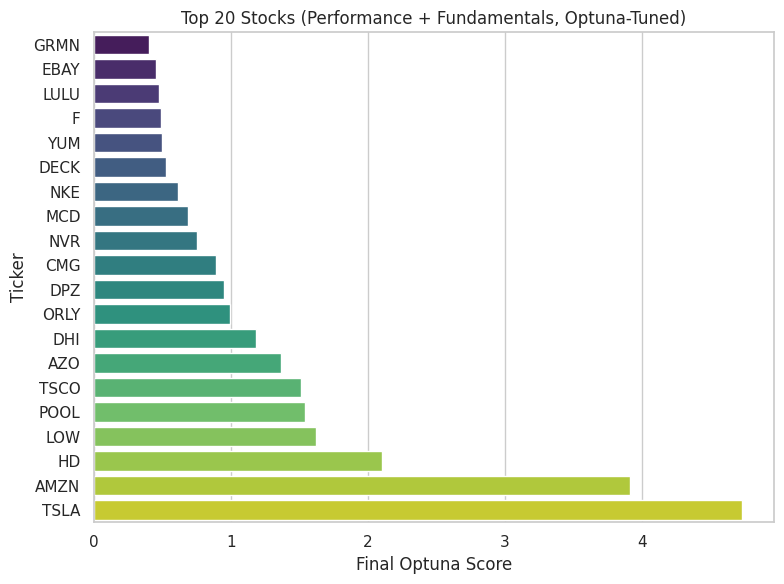

In [ ]:

#===============================================================
# 1) RENAME & MERGE TIME-FRAME PERFORMANCE DATA
#===============================================================
# Rename columns in each DataFrame for clarity
_results_10y = _results_10y.rename(columns={
    "Cumulative Return": "CumulativeReturn_10y",
    "Volatility":       "Volatility_10y",
    "Return-to-Risk":   "ReturnToRisk_10y"
})
_results_5y = _results_5y.rename(columns={
    "Cumulative Return": "CumulativeReturn_5y",
    "Volatility":       "Volatility_5y",
    "Return-to-Risk":   "ReturnToRisk_5y"
})
_results_3y = _results_3y.rename(columns={
    "Cumulative Return": "CumulativeReturn_3y",
    "Volatility":       "Volatility_3y",
    "Return-to-Risk":   "ReturnToRisk_3y"
})
_results_1y = _results_1y.rename(columns={
    "Cumulative Return": "CumulativeReturn_1y",
    "Volatility":       "Volatility_1y",
    "Return-to-Risk":   "ReturnToRisk_1y"
})

# Merge all time frames into one DataFrame
df_10y = _results_10y[["Ticker","CumulativeReturn_10y","Volatility_10y","ReturnToRisk_10y"]]
df_5y  = _results_5y[ ["Ticker","CumulativeReturn_5y","Volatility_5y","ReturnToRisk_5y"]]
df_3y  = _results_3y[ ["Ticker","CumulativeReturn_3y","Volatility_3y","ReturnToRisk_3y"]]
df_1y  = _results_1y[ ["Ticker","CumulativeReturn_1y","Volatility_1y","ReturnToRisk_1y"]]

merged_df = (
    df_10y.merge(df_5y, on="Ticker", how="inner")
          .merge(df_3y, on="Ticker", how="inner")
          .merge(df_1y, on="Ticker", how="inner")
)

print("merged_df shape (performance only):", merged_df.shape)

#===============================================================
# 2) STANDARDIZE PERFORMANCE COLUMNS (Z-SCORES)
#===============================================================
def zscore(series):
    if series.std(ddof=0) == 0:
        return pd.Series([0]*len(series), index=series.index)
    return (series - series.mean()) / series.std(ddof=0)

# Identify performance columns
cumret_cols = ["CumulativeReturn_10y","CumulativeReturn_5y","CumulativeReturn_3y","CumulativeReturn_1y"]
vol_cols    = ["Volatility_10y","Volatility_5y","Volatility_3y","Volatility_1y"]
rtr_cols    = ["ReturnToRisk_10y","ReturnToRisk_5y","ReturnToRisk_3y","ReturnToRisk_1y"]

# Z-score each column, invert volatility
for col in cumret_cols + vol_cols + rtr_cols:
    merged_df[f"z_{col}"] = zscore(merged_df[col])

for col in vol_cols:
    merged_df[f"z_{col}"] = -1.0 * merged_df[f"z_{col}"]  # lower vol => higher score

#===============================================================
# 3) MERGE WITH FUNDAMENTALS & STANDARDIZE
#===============================================================
# 'fund_df' has columns: ["Ticker","TTM_Revenue","TTM_NetIncome","TTM_NetMargin","TrailingPE"]
final_merged = merged_df.merge(fund_df, on="Ticker", how="left")

def safe_zscore(series):
    if series.std(ddof=0) == 0:
        return pd.Series([0]*len(series), index=series.index)
    return (series - series.mean()) / series.std(ddof=0)

# TTM_Revenue, TTM_NetMargin => higher is better
final_merged["z_TTM_Revenue"] = safe_zscore(final_merged["TTM_Revenue"].fillna(0))
final_merged["z_TTM_NetMargin"] = safe_zscore(final_merged["TTM_NetMargin"].fillna(0))

# TrailingPE => lower is better => invert after z-score
z_pe = safe_zscore(final_merged["TrailingPE"].fillna(9999))  # large fill for missing
final_merged["z_TrailingPE"] = -1.0 * z_pe

print("final_merged shape (performance + fundamentals):", final_merged.shape)
print(final_merged.head())

#===============================================================
# 4) DEFINE OPTUNA OBJECTIVE INCORPORATING PERFORMANCE + FUNDAMENTALS
#===============================================================
def objective(trial):
    # A) Performance metric weights
    w_cr  = trial.suggest_float("w_cr",  0.0, 1.0)
    w_vol = trial.suggest_float("w_vol", 0.0, 1.0)
    w_rtr = trial.suggest_float("w_rtr", 0.0, 1.0)
    sum_perf = w_cr + w_vol + w_rtr
    if sum_perf == 0:
        return -9999
    w_cr  /= sum_perf
    w_vol /= sum_perf
    w_rtr /= sum_perf

    # B) Fundamental metric weights
    w_rev    = trial.suggest_float("w_rev",    0.0, 1.0)
    w_margin = trial.suggest_float("w_margin", 0.0, 1.0)
    w_pe     = trial.suggest_float("w_pe",     0.0, 1.0)
    sum_fund = w_rev + w_margin + w_pe
    if sum_fund == 0:
        return -9999
    w_rev    /= sum_fund
    w_margin /= sum_fund
    w_pe     /= sum_fund

    # C) Time-frame weights
    w_10y = trial.suggest_float("w_10y", 0.0, 1.0)
    w_5y  = trial.suggest_float("w_5y",  0.0, 1.0)
    w_3y  = trial.suggest_float("w_3y",  0.0, 1.0)
    w_1y  = trial.suggest_float("w_1y",  0.0, 1.0)
    sum_tf = w_10y + w_5y + w_3y + w_1y
    if sum_tf == 0:
        return -9999
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

    df = final_merged.copy()

    def combined_score(row):
        # PERFORMANCE
        perf_10y = (w_cr*row["z_CumulativeReturn_10y"] + w_vol*row["z_Volatility_10y"] + w_rtr*row["z_ReturnToRisk_10y"]) * w_10y
        perf_5y  = (w_cr*row["z_CumulativeReturn_5y"]  + w_vol*row["z_Volatility_5y"]  + w_rtr*row["z_ReturnToRisk_5y"])  * w_5y
        perf_3y  = (w_cr*row["z_CumulativeReturn_3y"]  + w_vol*row["z_Volatility_3y"]  + w_rtr*row["z_ReturnToRisk_3y"])  * w_3y
        perf_1y  = (w_cr*row["z_CumulativeReturn_1y"]  + w_vol*row["z_Volatility_1y"]  + w_rtr*row["z_ReturnToRisk_1y"])  * w_1y
        perf_sum = perf_10y + perf_5y + perf_3y + perf_1y

        # FUNDAMENTALS
        fund_sum = (w_rev*row["z_TTM_Revenue"]
                    + w_margin*row["z_TTM_NetMargin"]
                    + w_pe*row["z_TrailingPE"])

        return perf_sum + fund_sum

    df["combined_score"] = df.apply(combined_score, axis=1)

    # Pick top 10
    top_10 = df.nlargest(10, "combined_score")

    # Example objective: average ReturnToRisk_10y + average z_TTM_NetMargin
    avg_rtr_10y   = top_10["ReturnToRisk_10y"].mean()
    avg_netmargin = top_10["z_TTM_NetMargin"].mean()
    objective_value = avg_rtr_10y + avg_netmargin
    return objective_value

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

print("\nBest hyperparameters:", study.best_params)
print("Best objective value:", study.best_value)

#===============================================================
# 5) RE-APPLY BEST WEIGHTS & PRINT TOP 20
#===============================================================
best = study.best_params

# Extract performance metric weights
w_cr, w_vol, w_rtr = best["w_cr"], best["w_vol"], best["w_rtr"]
sum_perf = w_cr + w_vol + w_rtr
if sum_perf > 0:
    w_cr  /= sum_perf
    w_vol /= sum_perf
    w_rtr /= sum_perf

# Extract fundamental metric weights
w_rev, w_margin, w_pe = best["w_rev"], best["w_margin"], best["w_pe"]
sum_fund = w_rev + w_margin + w_pe
if sum_fund > 0:
    w_rev    /= sum_fund
    w_margin /= sum_fund
    w_pe     /= sum_fund

# Extract time-frame weights
w_10y, w_5y, w_3y, w_1y = best["w_10y"], best["w_5y"], best["w_3y"], best["w_1y"]
sum_tf = w_10y + w_5y + w_3y + w_1y
if sum_tf > 0:
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

def final_score(row):
    perf_10y = (w_cr*row["z_CumulativeReturn_10y"] + w_vol*row["z_Volatility_10y"] + w_rtr*row["z_ReturnToRisk_10y"]) * w_10y
    perf_5y  = (w_cr*row["z_CumulativeReturn_5y"]  + w_vol*row["z_Volatility_5y"]  + w_rtr*row["z_ReturnToRisk_5y"])  * w_5y
    perf_3y  = (w_cr*row["z_CumulativeReturn_3y"]  + w_vol*row["z_Volatility_3y"]  + w_rtr*row["z_ReturnToRisk_3y"])  * w_3y
    perf_1y  = (w_cr*row["z_CumulativeReturn_1y"]  + w_vol*row["z_Volatility_1y"]  + w_rtr*row["z_ReturnToRisk_1y"])  * w_1y
    perf_sum = perf_10y + perf_5y + perf_3y + perf_1y

    fund_sum = (w_rev*row["z_TTM_Revenue"]
                + w_margin*row["z_TTM_NetMargin"]
                + w_pe*row["z_TrailingPE"])

    return perf_sum + fund_sum

final_merged["FinalOptunaScore"] = final_merged.apply(final_score, axis=1)
final_merged.sort_values("FinalOptunaScore", ascending=False, inplace=True)

top_20 = final_merged.head(20).copy()
print("\n=== Final Top 20 After Performance + Fundamentals Optuna ===")
print(top_20[["Ticker","FinalOptunaScore","ReturnToRisk_10y","TTM_NetMargin","TrailingPE"]])

# Optional quick barplot
import seaborn as sns
import matplotlib.pyplot as plt

top_20_sorted = top_20.sort_values("FinalOptunaScore", ascending=True)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_20_sorted,
    x="FinalOptunaScore",
    y="Ticker",
    palette="viridis"
)
plt.title("Top 20 Stocks (Performance + Fundamentals, Optuna-Tuned)")
plt.xlabel("Final Optuna Score")
plt.ylabel("Ticker")
plt.tight_layout()
plt.show()


## MPT and optimising sizes

In [ ]:
import pandas as pd
import yfinance as yf
import optuna
import numpy as np

# List of selected stocks
selected_tickers = ['NVDA', 'AAPL', 'AMZN', 'META', 'GOOGL']

def get_annualized_return(ticker, start_date, end_date):
    """
    Downloads historical prices for a ticker between start_date and end_date,
    computes daily returns, and returns the annualized mean return as a float.
    """
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    # Use 'Adj Close' if available; otherwise, fall back to 'Close'
    if 'Adj Close' in data.columns:
        prices = data['Adj Close']
    else:
        prices = data['Close']
    returns = prices.pct_change().dropna()
    # Convert one-element Series to scalar using .iloc[0]
    annualized_return = float((returns.mean() * 252).iloc[0] if hasattr(returns.mean(), 'iloc') else returns.mean() * 252)
    return annualized_return

def objective(trial):
    # Candidate lookback period in years (between 3 and 10 years)
    lookback_years = trial.suggest_int("lookback_years", 3, 10)

    # Define training period: ending 2021-12-31; training start is determined by lookback period
    training_end = "2021-12-31"
    training_start_year = 2021 - lookback_years + 1  # e.g., for a 5-year lookback, start in 2017
    training_start = f"{training_start_year}-01-01"

    # Validation period: the year 2022
    validation_start = "2022-01-01"
    validation_end = "2022-12-31"

    errors = []
    for ticker in selected_tickers:
        try:
            # Estimate annualized return over training period
            train_ret = get_annualized_return(ticker, training_start, training_end)
            # Estimate annualized return over validation period
            val_ret = get_annualized_return(ticker, validation_start, validation_end)
            # Compute the absolute error between training and validation returns
            errors.append(abs(train_ret - val_ret))
        except Exception as e:
            # In case of error, skip the ticker
            continue
    # Use the average error across all stocks as the objective
    avg_error = np.mean(errors) if errors else np.inf
    return avg_error

# Create and run the Optuna study to optimize the lookback period
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best lookback period (years):", study.best_params["lookback_years"]) #Optimal number of years to be considered into MPT


Best lookback period (years): 10


## Looking for further optimisation

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Parameters and Data Download
# ---------------------------
selected_tickers = ['NVDA', 'AAPL', 'AMZN', 'META', 'GOOGL']
start_date = "2012-01-01"  # 10-year lookback period ending 2022-12-31
end_date   = "2022-01-01"

# Download stock data from yfinance
data = yf.download(selected_tickers, start=start_date, end=end_date, progress=False)
if isinstance(data.columns, pd.MultiIndex):
    if "Adj Close" in data.columns.get_level_values(0):
        stock_prices = data["Adj Close"]
    else:
        stock_prices = data["Close"]
else:
    if "Adj Close" in data.columns:
        stock_prices = data["Adj Close"]
    else:
        stock_prices = data["Close"]

# Compute daily returns
stock_returns = stock_prices.pct_change().dropna()

# ---------------------------
# Fetch Fama–French 3-Factor Data via pandas_datareader
# ---------------------------
ff = web.DataReader("F-F_Research_Data_Factors", "famafrench", start=start_date, end=end_date)[0]
# Determine correct format based on the index string pattern
example_index = ff.index[0]
if '-' in str(example_index):
    ff.index = pd.to_datetime(ff.index.astype(str), format="%Y-%m")
else:
    ff.index = pd.to_datetime(ff.index.astype(str), format="%Y%m")
# Resample monthly data to daily frequency using forward fill
ff_daily = ff.resample('D').ffill()
# Restrict factor data to the period of our stock returns
ff_daily = ff_daily.loc[ff_daily.index >= pd.to_datetime(start_date)]
# Rename columns: replace '-' with '_' (e.g., "Mkt-RF" becomes "Mkt_RF")
ff_daily.columns = ff_daily.columns.str.replace('-', '_')
# Convert factor values from percentages to decimals
ff_daily[['Mkt_RF', 'SMB', 'HML', 'RF']] = ff_daily[['Mkt_RF', 'SMB', 'HML', 'RF']] / 100


# ---------------------------
# Compute Multifactor Expected Returns for Each Stock
# ---------------------------
expected_returns = {}
for ticker in selected_tickers:
    df = pd.concat([stock_returns[ticker], ff_daily], axis=1).dropna()
    df.columns = ['stock_return', 'Mkt_RF', 'SMB', 'HML', 'RF']
    df['excess_return'] = df['stock_return'] - df['RF']

    X = df[['Mkt_RF', 'SMB', 'HML']]
    X = sm.add_constant(X)
    y = df['excess_return']
    model = sm.OLS(y, X).fit()

    # Average daily factor returns over the period
    avg_factors = ff_daily[['Mkt_RF', 'SMB', 'HML']].mean()
    expected_daily_excess = (model.params['const'] +
                             model.params['Mkt_RF'] * avg_factors['Mkt_RF'] +
                             model.params['SMB'] * avg_factors['SMB'] +
                             model.params['HML'] * avg_factors['HML'])
    annual_expected_excess = expected_daily_excess * 252
    annual_rf = ff_daily['RF'].mean() * 252
    expected_returns[ticker] = annual_rf + annual_expected_excess


# ---------------------------
# Compute Historical Covariance Matrix (Annualized)
# ---------------------------
cov_matrix = stock_returns[selected_tickers].cov() * 252

# ---------------------------
# MPT Simulation using Multifactor Expected Returns (with min weight constraint)
# ---------------------------
num_portfolios = 15000  # Number of simulated portfolios
results = np.zeros((3, num_portfolios))  # Rows: [Portfolio Return, Portfolio Volatility, Sharpe Ratio]
weights_record = []
multi_expected_returns = np.array([expected_returns[ticker] for ticker in selected_tickers])
risk_free_rate_annual = ff_daily['RF'].mean() * 252

n = len(selected_tickers)
min_weight = 0.05  # Minimum weight per stock

for i in range(num_portfolios):
    # Generate weights that sum to 1 with each weight >= 0.05 using a Dirichlet-based method
    weights = min_weight + np.random.dirichlet(np.ones(n)) * (1 - n * min_weight)
    weights_record.append(weights)

    port_return = np.dot(weights, multi_expected_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - risk_free_rate_annual) / port_vol

    results[0, i] = port_return
    results[1, i] = port_vol
    results[2, i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

print("\nOptimal Portfolio using Multifactor Expected Returns (MPT):")
print(max_sharpe_portfolio)
optimal_weights_df = pd.DataFrame({'Ticker': selected_tickers, 'Weight (%)': optimal_weights*100})
print("\nOptimal Weights (each >= 5%):")
print(optimal_weights_df)

<ipython-input-15-f6370347ca77>:35: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = web.DataReader("F-F_Research_Data_Factors", "famafrench", start=start_date, end=end_date)[0]
<ipython-input-15-f6370347ca77>:35: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = web.DataReader("F-F_Research_Data_Factors", "famafrench", start=start_date, end=end_date)[0]



Optimal Portfolio using Multifactor Expected Returns (MPT):
Return          0.481588
Volatility      0.328809
Sharpe Ratio    1.114542
Name: 12099, dtype: float64

Optimal Weights (each >= 5%):
  Ticker  Weight (%)
0   NVDA   68.270098
1   AAPL    6.358610
2   AMZN   13.973994
3   META    5.919235
4  GOOGL    5.478063


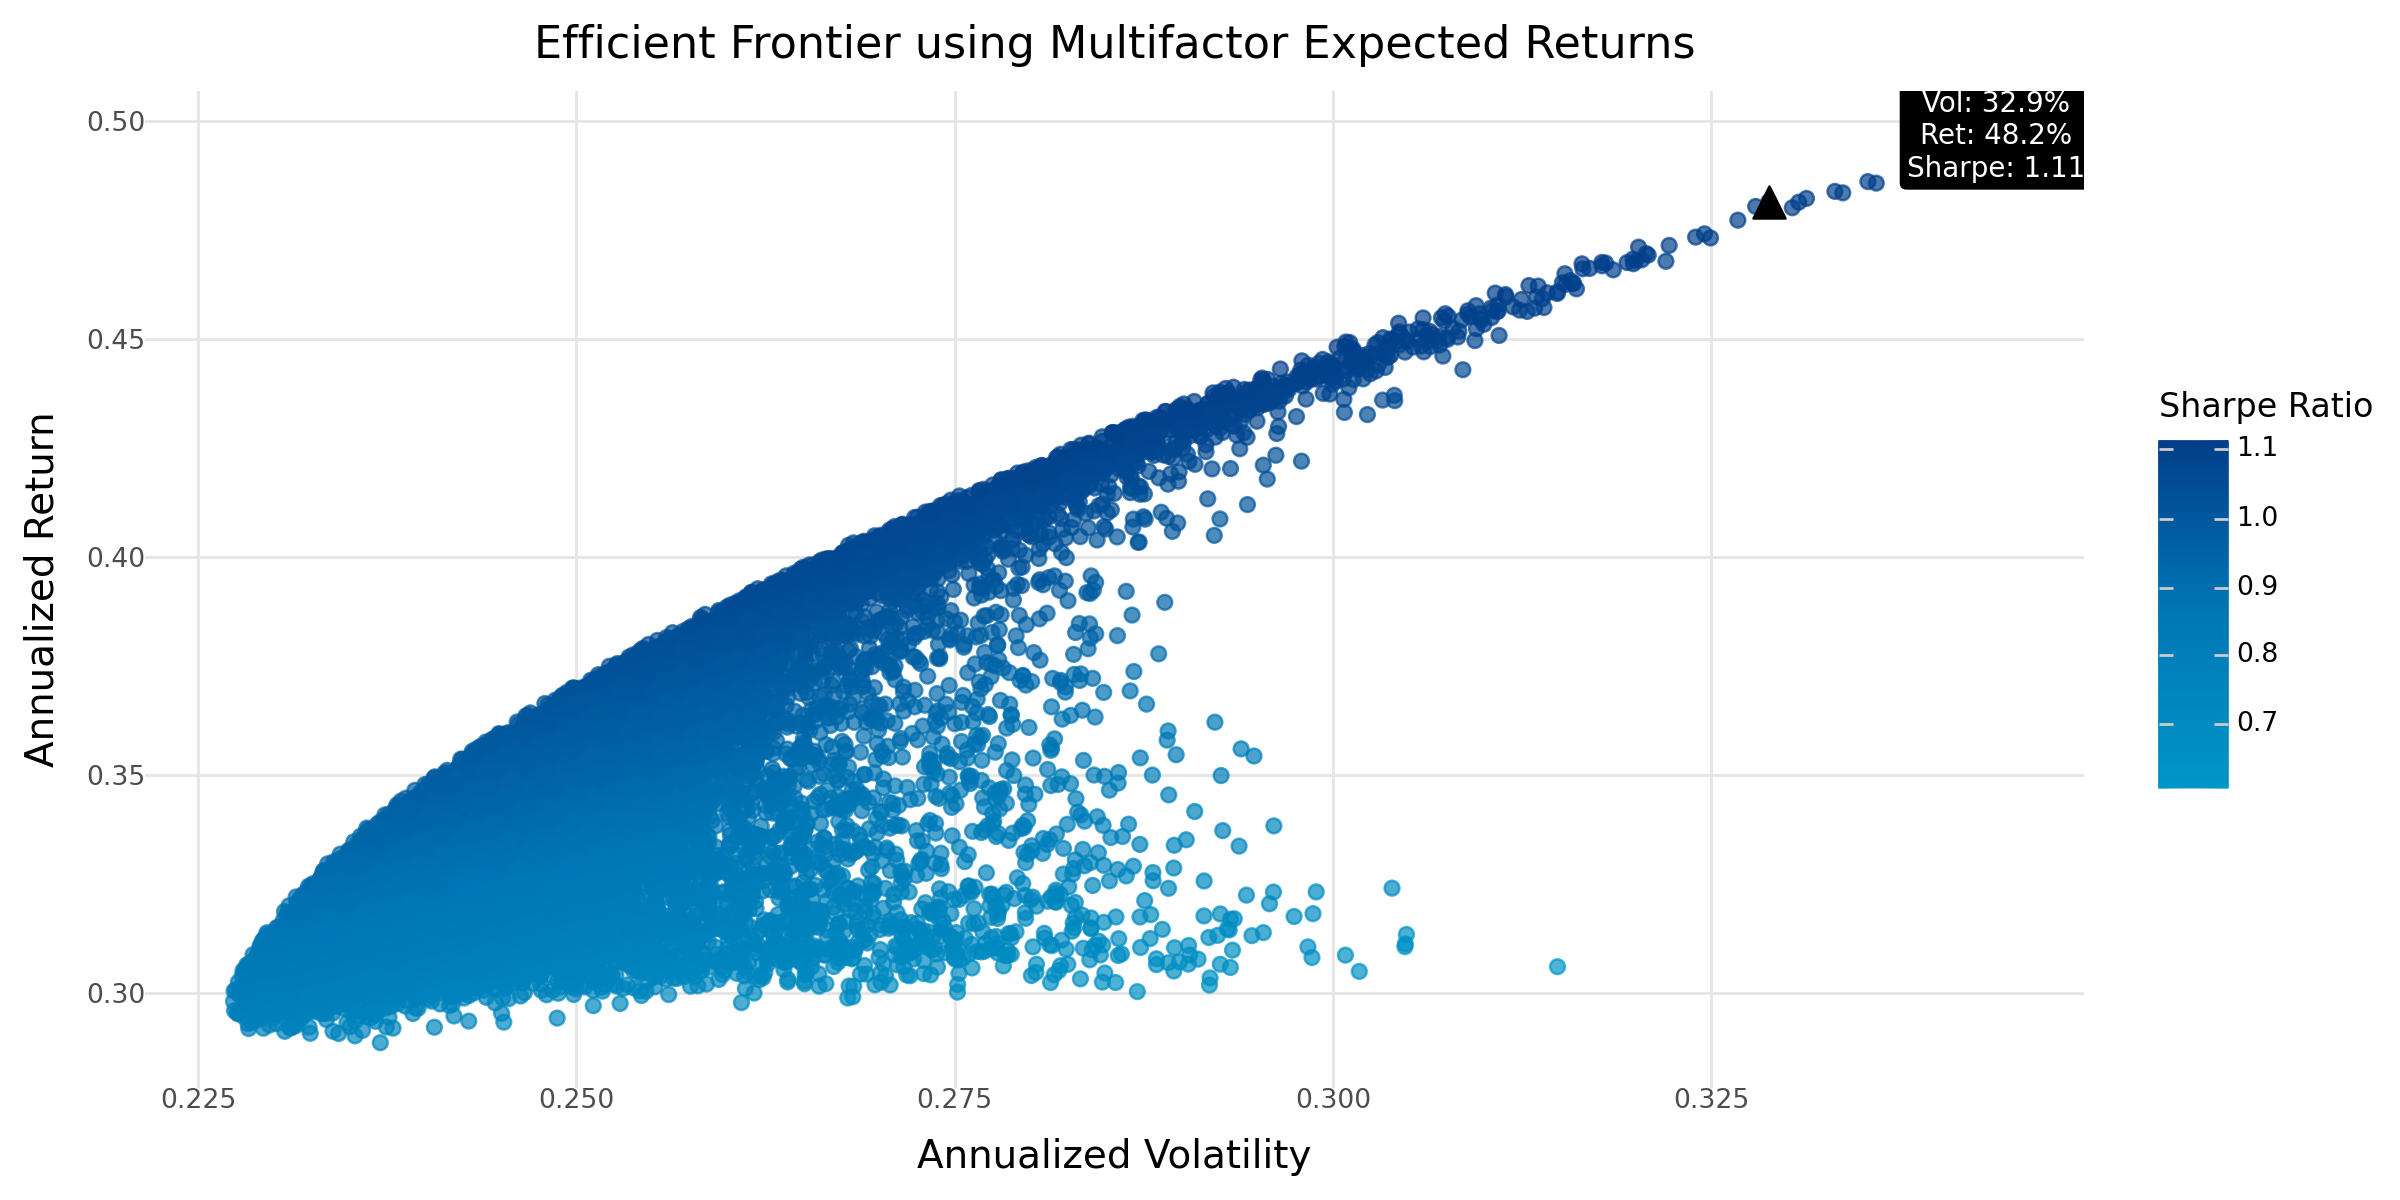

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_label, scale_color_gradientn,
    labs, theme_minimal, theme, element_text, element_blank
)

optimal_df = pd.DataFrame({
    'Volatility': [max_sharpe_portfolio['Volatility']],
    'Return': [max_sharpe_portfolio['Return']],
    'Sharpe Ratio': [max_sharpe_portfolio['Sharpe Ratio']]
})

vol_pct = 100 * max_sharpe_portfolio['Volatility']
ret_pct = 100 * max_sharpe_portfolio['Return']
sharpe_val = max_sharpe_portfolio['Sharpe Ratio']

optimal_label = (f"Vol: {vol_pct:.1f}%\n"
                 f"Ret: {ret_pct:.1f}%\n"
                 f"Sharpe: {sharpe_val:.2f}")
optimal_df['Label'] = optimal_label

custom_colors = [
    "#0096c7",
    "#0077b6",
    "#023e8a"
]

gg = (
    ggplot(results_df, aes(x='Volatility', y='Return', color='Sharpe Ratio'))
    + geom_point(size=2.5, alpha=0.7)
    + geom_point(
        mapping=aes(x='Volatility', y='Return'),
        data=optimal_df,
        shape='^',
        color='black',
        size=6
    )
    + geom_label(
        mapping=aes(label='Label'),
        data=optimal_df,
        color='white',
        fill='black',
        size=10,
        label_padding=0.25,
        label_size=0,
        # Positive x and y nudges move the label top-right
        nudge_x=0.015,
        nudge_y=0.015
    )
    + scale_color_gradientn(colors=custom_colors)
    + labs(
        title="Efficient Frontier using Multifactor Expected Returns",
        x="Annualized Volatility",
        y="Annualized Return",
        color="Sharpe Ratio"
    )
    + theme_minimal(base_size=12, base_family='sans')
    + theme(
        figure_size=(12, 6),
        axis_title=element_text(size=14),
        plot_title=element_text(size=16),
        legend_position='right',
        panel_grid_minor=element_blank()
    )
)

gg


## MONTE CARLO SIMULATIONS

In [ ]:
import numpy as np
import pandas as pd
import optuna

# ---------------------------------
# Block Bootstrap Daily Returns
# ---------------------------------
def block_bootstrap_daily_returns(returns_data, weights, days_to_simulate, block_size, num_simulations=1000):
    """
    Returns a 2D array of shape (num_simulations, days_to_simulate),
    where each row is the daily return path of the portfolio.

    :param returns_data: DataFrame or array of shape (T, n_stocks) with daily returns
    :param weights: array of shape (n_stocks,) for the portfolio
    :param days_to_simulate: int, e.g. 252 for one year
    :param block_size: int, number of consecutive days in each block
    :param num_simulations: number of simulation paths
    :return: daily_returns_all (num_simulations, days_to_simulate)
    """
    T = len(returns_data)
    returns_array = returns_data.values  # shape: (T, n_stocks)
    n_stocks = len(weights)

    daily_returns_all = np.zeros((num_simulations, days_to_simulate), dtype=np.float64)

    for sim_idx in range(num_simulations):
        path_daily_returns = []
        num_blocks = days_to_simulate // block_size
        leftover_days = days_to_simulate % block_size

        # Sample full blocks
        for _ in range(num_blocks):
            start_idx = np.random.randint(0, T - block_size)
            block = returns_array[start_idx:start_idx+block_size, :]  # shape: (block_size, n_stocks)
            for day_returns in block:
                path_daily_returns.append(np.dot(weights, day_returns))

        # Handle leftover days
        if leftover_days > 0:
            start_idx = np.random.randint(0, T - leftover_days)
            leftover_block = returns_array[start_idx:start_idx+leftover_days, :]
            for day_returns in leftover_block:
                path_daily_returns.append(np.dot(weights, day_returns))

        daily_returns_all[sim_idx, :] = path_daily_returns

    return daily_returns_all

# ---------------------------------
# Objective Function for Optuna
# ---------------------------------
def objective(trial):
    """
    Tune the block_size to maximize the average daily Sharpe ratio (annualized) across simulations,
    subtracting a 1.25% annual risk-free rate.
    """
    # Suggest a block size between 5 and 60 days
    block_size = trial.suggest_int('block_size', 5, 60)

    # Generate daily returns using block bootstrap
    daily_returns_all = block_bootstrap_daily_returns(
        returns_data=stock_returns[selected_tickers].dropna(),
        weights=optimal_weights,
        days_to_simulate=252,
        block_size=block_size,
        num_simulations=10000  # Adjust as desired
    )

    n_sims = daily_returns_all.shape[0]
    sharpe_ratios = np.zeros(n_sims)

    # Convert 1.25% annual to daily risk-free rate
    daily_rf = 0.0125 / 252  # ~0.0000496

    for i in range(n_sims):
        path = daily_returns_all[i, :]
        mean_path = np.mean(path)
        std_path = np.std(path)

        # Subtract daily risk-free rate from the mean daily return
        excess_mean = mean_path - daily_rf

        if std_path == 0:
            sharpe_ratios[i] = -9999  # undefined
        else:
            # Annualized Sharpe = (excess_mean / std) * sqrt(252)
            sharpe_ratios[i] = (excess_mean / std_path) * np.sqrt(252)

    avg_sharpe = np.mean(sharpe_ratios)
    return avg_sharpe

# ---------------------------------
# Run Optuna with Parallelization
# ---------------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, n_jobs=-1)

print("Best parameters:", study.best_params)
print("Best daily Sharpe (with 1.25% RF):", study.best_value)


Best parameters: {'block_size': 51}
Best daily Sharpe (with 1.25% RF): 1.570554608485339


In [ ]:
best_block_size = study.best_params['block_size']
final_daily_returns = block_bootstrap_daily_returns(
    returns_data=stock_returns[selected_tickers].dropna(),
    weights=optimal_weights,
    days_to_simulate=252,
    block_size=best_block_size,
    num_simulations=10000  # More simulations for better statistics
)


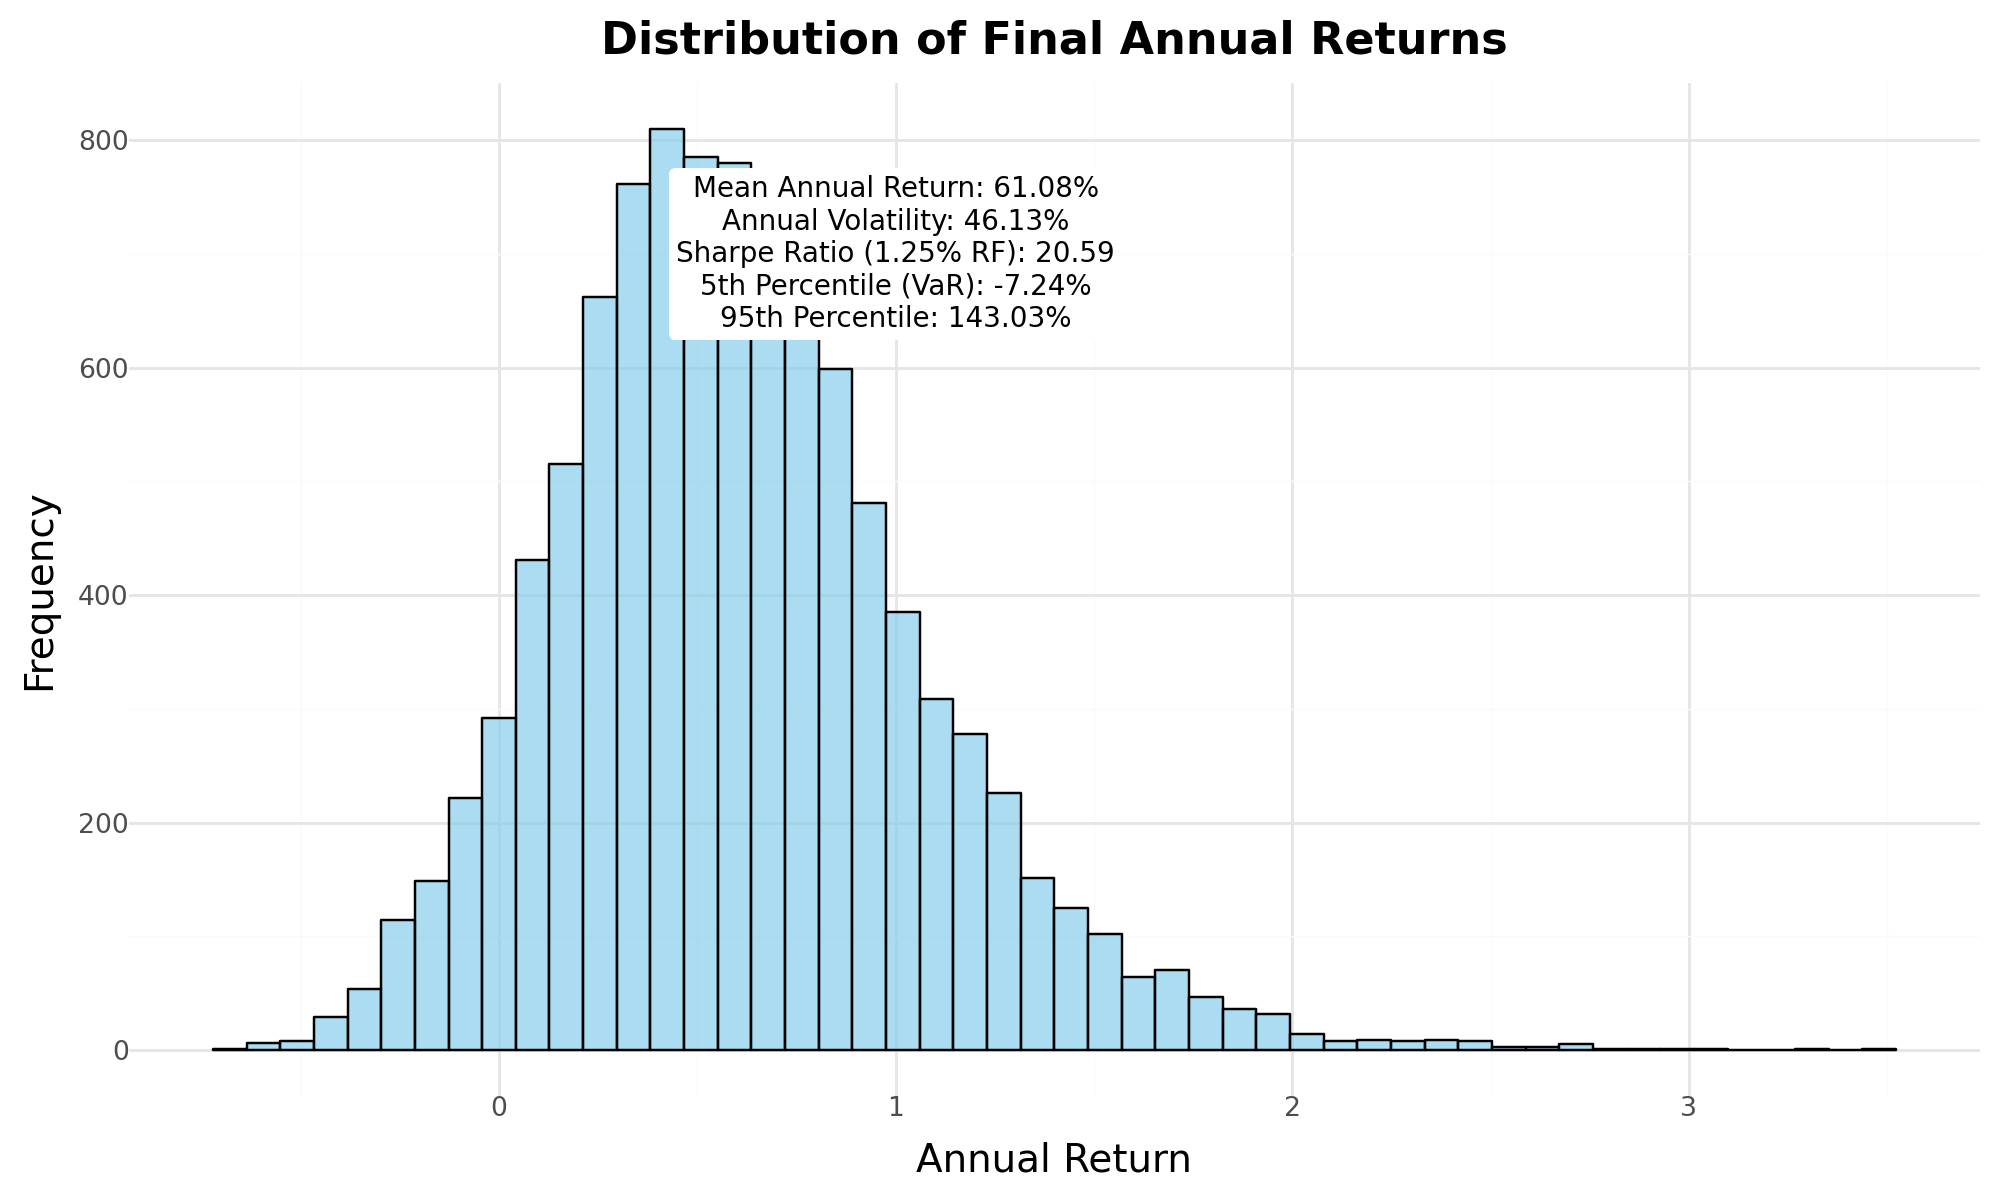

In [ ]:
import pandas as pd
import numpy as np
from plotnine import (
    ggplot, aes, geom_histogram, geom_label, labs,
    theme_minimal, theme, element_text
)

# 1) Convert final_daily_returns to final_annual_returns
final_annual_returns = (1 + final_daily_returns).prod(axis=1) - 1

# 2) Compute summary stats
mean_ret = final_annual_returns.mean()
std_ret  = final_annual_returns.std()
excess_mean = mean_ret - 0.0125  # 1.25% annual
if std_ret != 0:
    final_sharpe = (excess_mean / std_ret) * np.sqrt(252)  # if daily returns
else:
    final_sharpe = 0

pct_5  = np.percentile(final_annual_returns, 5)
pct_95 = np.percentile(final_annual_returns, 95)

# 3) Create a DataFrame for plotting
df = pd.DataFrame({'Annual Return': final_annual_returns})

annotation_text = (
    f"Mean Annual Return: {mean_ret*100:.2f}%\n"
    f"Annual Volatility: {std_ret*100:.2f}%\n"
    f"Sharpe Ratio (1.25% RF): {final_sharpe:.2f}\n"
    f"5th Percentile (VaR): {pct_5*100:.2f}%\n"
    f"95th Percentile: {pct_95*100:.2f}%"
)

# 4) Plot
hist_gg = (
    ggplot(df, aes(x='Annual Return'))
    + geom_histogram(bins=50, fill='skyblue', color='black', alpha=0.7)
    + geom_label(
        inherit_aes=False,
        x=1.0,   # adjust as needed
        y=700,   # adjust as needed
        label=annotation_text,
        label_size=0,
        size=10,
        color='black',
        fill='white'
    )
    + labs(
        title="Distribution of Final Annual Returns",
        x="Annual Return",
        y="Frequency"
    )
    + theme_minimal(base_size=12)
    + theme(
        figure_size=(10, 6),
        plot_title=element_text(size=16, weight='bold'),
        axis_title=element_text(size=14)
    )
)

hist_gg


In [ ]:
! pip install pygwalker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
import pygwalker as pyg

#===============================================================
# 1) RENAME & MERGE TIME-FRAME PERFORMANCE DATA
#===============================================================
_results_10y = _results_10y.rename(columns={
    "Cumulative Return": "CumulativeReturn_10y",
    "Volatility":       "Volatility_10y",
    "Return-to-Risk":   "ReturnToRisk_10y"
})
_results_5y = _results_5y.rename(columns={
    "Cumulative Return": "CumulativeReturn_5y",
    "Volatility":       "Volatility_5y",
    "Return-to-Risk":   "ReturnToRisk_5y"
})
_results_3y = _results_3y.rename(columns={
    "Cumulative Return": "CumulativeReturn_3y",
    "Volatility":       "Volatility_3y",
    "Return-to-Risk":   "ReturnToRisk_3y"
})
_results_1y = _results_1y.rename(columns={
    "Cumulative Return": "CumulativeReturn_1y",
    "Volatility":       "Volatility_1y",
    "Return-to-Risk":   "ReturnToRisk_1y"
})

df_10y = _results_10y[["Ticker","CumulativeReturn_10y","Volatility_10y","ReturnToRisk_10y"]]
df_5y  = _results_5y[ ["Ticker","CumulativeReturn_5y","Volatility_5y","ReturnToRisk_5y"]]
df_3y  = _results_3y[ ["Ticker","CumulativeReturn_3y","Volatility_3y","ReturnToRisk_3y"]]
df_1y  = _results_1y[ ["Ticker","CumulativeReturn_1y","Volatility_1y","ReturnToRisk_1y"]]

merged_df = (
    df_10y.merge(df_5y, on="Ticker", how="inner")
          .merge(df_3y, on="Ticker", how="inner")
          .merge(df_1y, on="Ticker", how="inner")
)

print("merged_df shape (performance only):", merged_df.shape)

#===============================================================
# 2) STANDARDIZE PERFORMANCE COLUMNS (Z-SCORES)
#===============================================================
def zscore(series):
    if series.std(ddof=0) == 0:
        return pd.Series([0]*len(series), index=series.index)
    return (series - series.mean()) / series.std(ddof=0)

cumret_cols = ["CumulativeReturn_10y","CumulativeReturn_5y","CumulativeReturn_3y","CumulativeReturn_1y"]
vol_cols    = ["Volatility_10y","Volatility_5y","Volatility_3y","Volatility_1y"]
rtr_cols    = ["ReturnToRisk_10y","ReturnToRisk_5y","ReturnToRisk_3y","ReturnToRisk_1y"]

for col in cumret_cols + vol_cols + rtr_cols:
    merged_df[f"z_{col}"] = zscore(merged_df[col])

# Invert volatility => lower vol => higher score
for col in vol_cols:
    merged_df[f"z_{col}"] = -1.0 * merged_df[f"z_{col}"]

#===============================================================
# 3) MERGE WITH FUNDAMENTALS & STANDARDIZE
#===============================================================
# 'fund_df' has columns: ["Ticker","TTM_Revenue","TTM_NetIncome","TTM_NetMargin","TrailingPE"]
final_merged = merged_df.merge(fund_df, on="Ticker", how="left")

def safe_zscore(series):
    if series.std(ddof=0) == 0:
        return pd.Series([0]*len(series), index=series.index)
    return (series - series.mean()) / series.std(ddof=0)

final_merged["z_TTM_Revenue"] = safe_zscore(final_merged["TTM_Revenue"].fillna(0))
final_merged["z_TTM_NetMargin"] = safe_zscore(final_merged["TTM_NetMargin"].fillna(0))

# TrailingPE => lower is better => invert after z-score
z_pe = safe_zscore(final_merged["TrailingPE"].fillna(9999))
final_merged["z_TrailingPE"] = -1.0 * z_pe

print("final_merged shape (performance + fundamentals):", final_merged.shape)
print(final_merged.head())

#===============================================================
# 4) DEFINE OPTUNA OBJECTIVE INCORPORATING PERFORMANCE + FUNDAMENTALS
#===============================================================
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")

def objective(trial):
    # A) Performance metric weights
    w_cr  = trial.suggest_float("w_cr",  0.0, 1.0)
    w_vol = trial.suggest_float("w_vol", 0.0, 1.0)
    w_rtr = trial.suggest_float("w_rtr", 0.0, 1.0)
    sum_perf = w_cr + w_vol + w_rtr
    if sum_perf == 0:
        return -9999
    w_cr  /= sum_perf
    w_vol /= sum_perf
    w_rtr /= sum_perf

    # B) Fundamental metric weights
    w_rev    = trial.suggest_float("w_rev",    0.0, 1.0)
    w_margin = trial.suggest_float("w_margin", 0.0, 1.0)
    w_pe     = trial.suggest_float("w_pe",     0.0, 1.0)
    sum_fund = w_rev + w_margin + w_pe
    if sum_fund == 0:
        return -9999
    w_rev    /= sum_fund
    w_margin /= sum_fund
    w_pe     /= sum_fund

    # C) Time-frame weights
    w_10y = trial.suggest_float("w_10y", 0.0, 1.0)
    w_5y  = trial.suggest_float("w_5y",  0.0, 1.0)
    w_3y  = trial.suggest_float("w_3y",  0.0, 1.0)
    w_1y  = trial.suggest_float("w_1y",  0.0, 1.0)
    sum_tf = w_10y + w_5y + w_3y + w_1y
    if sum_tf == 0:
        return -9999
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

    df = final_merged.copy()

    def combined_score(row):
        # PERFORMANCE
        perf_10y = (w_cr*row["z_CumulativeReturn_10y"] + w_vol*row["z_Volatility_10y"] + w_rtr*row["z_ReturnToRisk_10y"]) * w_10y
        perf_5y  = (w_cr*row["z_CumulativeReturn_5y"]  + w_vol*row["z_Volatility_5y"]  + w_rtr*row["z_ReturnToRisk_5y"])  * w_5y
        perf_3y  = (w_cr*row["z_CumulativeReturn_3y"]  + w_vol*row["z_Volatility_3y"]  + w_rtr*row["z_ReturnToRisk_3y"])  * w_3y
        perf_1y  = (w_cr*row["z_CumulativeReturn_1y"]  + w_vol*row["z_Volatility_1y"]  + w_rtr*row["z_ReturnToRisk_1y"])  * w_1y
        perf_sum = perf_10y + perf_5y + perf_3y + perf_1y

        # FUNDAMENTALS
        fund_sum = (
            w_rev*row["z_TTM_Revenue"] +
            w_margin*row["z_TTM_NetMargin"] +
            w_pe*row["z_TrailingPE"]
        )
        return perf_sum + fund_sum

    df["combined_score"] = df.apply(combined_score, axis=1)

    # Pick top 10
    top_10 = df.nlargest(10, "combined_score")

    # Example objective: average ReturnToRisk_10y + average z_TTM_NetMargin
    avg_rtr_10y   = top_10["ReturnToRisk_10y"].mean()
    avg_netmargin = top_10["z_TTM_NetMargin"].mean()
    objective_value = avg_rtr_10y + avg_netmargin

    return objective_value

study.optimize(objective, n_trials=100)

print("\nBest hyperparameters:", study.best_params)
print("Best objective value:", study.best_value)

#===============================================================
# 5) RE-APPLY BEST WEIGHTS & PRINT TOP 20
#===============================================================
best = study.best_params

# Extract performance metric weights
w_cr, w_vol, w_rtr = best["w_cr"], best["w_vol"], best["w_rtr"]
sum_perf = w_cr + w_vol + w_rtr
if sum_perf > 0:
    w_cr  /= sum_perf
    w_vol /= sum_perf
    w_rtr /= sum_perf

# Extract fundamental metric weights
w_rev, w_margin, w_pe = best["w_rev"], best["w_margin"], best["w_pe"]
sum_fund = w_rev + w_margin + w_pe
if sum_fund > 0:
    w_rev    /= sum_fund
    w_margin /= sum_fund
    w_pe     /= sum_fund

# Extract time-frame weights
w_10y, w_5y, w_3y, w_1y = best["w_10y"], best["w_5y"], best["w_3y"], best["w_1y"]
sum_tf = w_10y + w_5y + w_3y + w_1y
if sum_tf > 0:
    w_10y /= sum_tf
    w_5y  /= sum_tf
    w_3y  /= sum_tf
    w_1y  /= sum_tf

def final_score(row):
    perf_10y = (w_cr*row["z_CumulativeReturn_10y"] + w_vol*row["z_Volatility_10y"] + w_rtr*row["z_ReturnToRisk_10y"]) * w_10y
    perf_5y  = (w_cr*row["z_CumulativeReturn_5y"]  + w_vol*row["z_Volatility_5y"]  + w_rtr*row["z_ReturnToRisk_5y"])  * w_5y
    perf_3y  = (w_cr*row["z_CumulativeReturn_3y"]  + w_vol*row["z_Volatility_3y"]  + w_rtr*row["z_ReturnToRisk_3y"])  * w_3y
    perf_1y  = (w_cr*row["z_CumulativeReturn_1y"]  + w_vol*row["z_Volatility_1y"]  + w_rtr*row["z_ReturnToRisk_1y"])  * w_1y
    perf_sum = perf_10y + perf_5y + perf_3y + perf_1y

    fund_sum = (
        w_rev*row["z_TTM_Revenue"] +
        w_margin*row["z_TTM_NetMargin"] +
        w_pe*row["z_TrailingPE"]
    )
    return perf_sum + fund_sum

final_merged["FinalOptunaScore"] = final_merged.apply(final_score, axis=1)
final_merged.sort_values("FinalOptunaScore", ascending=False, inplace=True)

top_20 = final_merged.head(20).copy()
print("\n=== Final Top 20 After Performance + Fundamentals Optuna ===")
print(top_20[["Ticker","FinalOptunaScore","ReturnToRisk_10y","TTM_NetMargin","TrailingPE"]])

#===============================================================
# 6) VISUALIZE TOP 20 WITH PYGWALKER
#===============================================================
# We'll pass relevant columns to PyGWalker for a nicer bar chart or other interactive plot.

top_20_for_plot = top_20[[
    "Ticker",
    "FinalOptunaScore",
    "ReturnToRisk_10y",
    "TTM_NetMargin",
    "TrailingPE"
]].copy()

# Sort ascending if you want a bar chart from smallest to largest
top_20_for_plot.sort_values("FinalOptunaScore", ascending=True, inplace=True)
top_20_for_plot.reset_index(drop=True, inplace=True)

# Launch PyGWalker
pyg.walk(top_20_for_plot)


In [ ]:
!pip install pygal -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.0 MB/s eta 0:00:00


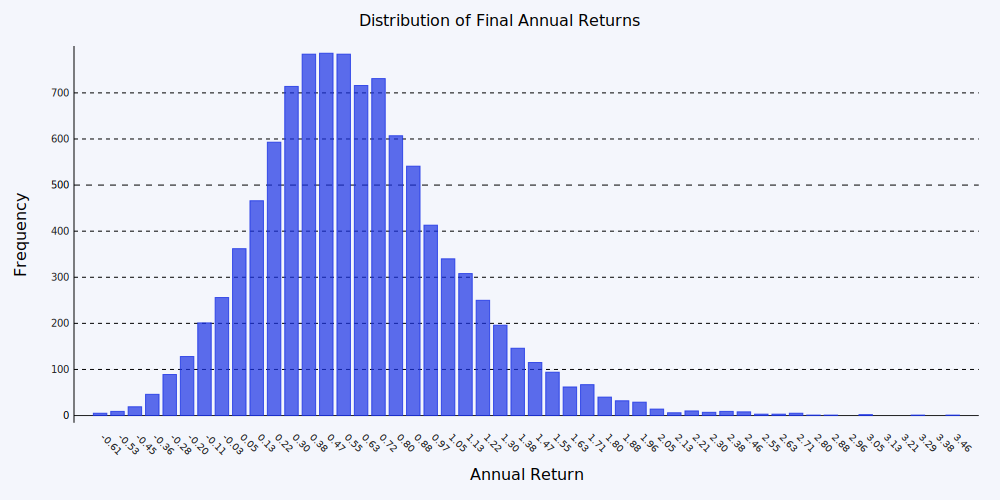

In [ ]:
import pygal
import numpy as np
import pandas as pd
from IPython.display import SVG, display
from pygal.style import Style

# 1) Convert final_daily_returns to final_annual_returns
final_annual_returns = (1 + final_daily_returns).prod(axis=1) - 1

# 2) Manually compute histogram bins for Pygal
counts, bin_edges = np.histogram(final_annual_returns, bins=50)
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

def plot_pygal_histogram(
    bin_centers,
    counts,
    chart_width=800,
    chart_height=400,
    font_family="sans-serif",
    background_color="#FFFFFF",
    plot_background_color="#F9F9F9",
    bar_color="#FF5733"
):
    # Set the colors tuple to a single color so Pygal won't use a default palette.
    custom_style = Style(
        font_family=font_family,
        background=background_color,
        plot_background=plot_background_color,
        colors=(bar_color,)  # Force all bars to use this single color
    )

    chart = pygal.Bar(
        title="Distribution of Final Annual Returns",
        x_title="Annual Return",
        y_title="Frequency",
        show_legend=False,
        x_label_rotation=45,
        width=chart_width,
        height=chart_height,
        style=custom_style
    )

    # Convert numeric bin centers to string labels
    chart.x_labels = [f"{center:.2f}" for center in bin_centers]

    # Just add the data; color is now controlled by the style's 'colors' tuple
    chart.add("Frequency", counts.tolist())

    svg_data = chart.render()
    display(SVG(svg_data))

# Example usage: single bar color = #0077b6
plot_pygal_histogram(
    bin_centers,
    counts,
    chart_width=1000,
    chart_height=500,
    font_family="sans-serif",
    background_color="#f4f6fc",
    plot_background_color="#f4f6fc",
    bar_color="#1931e4"
)


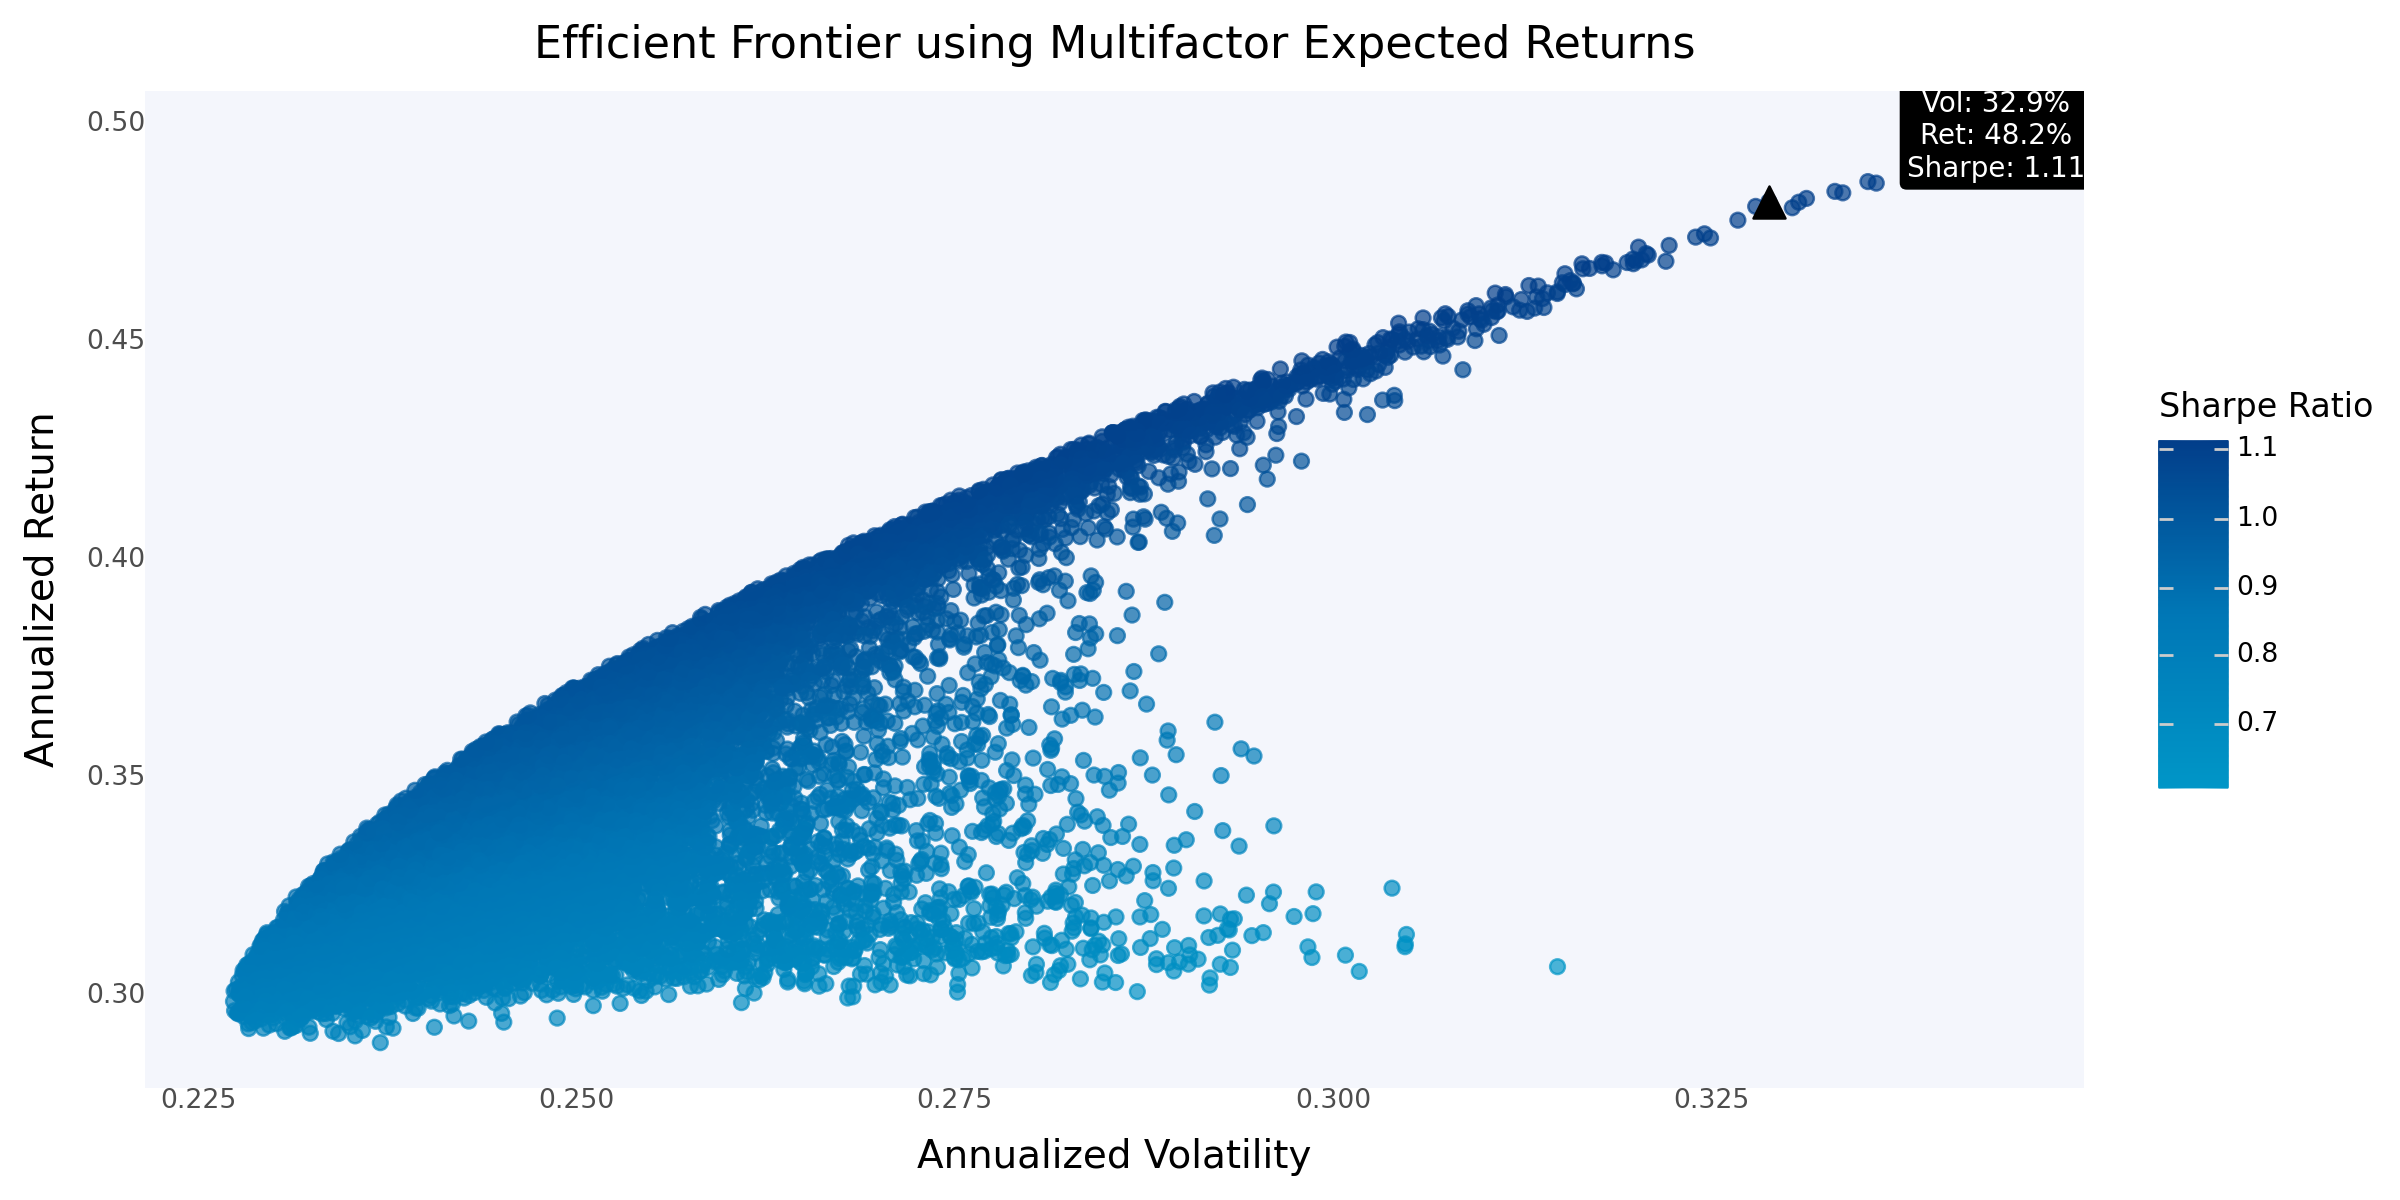

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_label, scale_color_gradientn,
    labs, theme_minimal, theme, element_text, element_blank, element_rect
)

optimal_df = pd.DataFrame({
    'Volatility': [max_sharpe_portfolio['Volatility']],
    'Return': [max_sharpe_portfolio['Return']],
    'Sharpe Ratio': [max_sharpe_portfolio['Sharpe Ratio']]
})

vol_pct = 100 * max_sharpe_portfolio['Volatility']
ret_pct = 100 * max_sharpe_portfolio['Return']
sharpe_val = max_sharpe_portfolio['Sharpe Ratio']

optimal_label = (f"Vol: {vol_pct:.1f}%\n"
                 f"Ret: {ret_pct:.1f}%\n"
                 f"Sharpe: {sharpe_val:.2f}")
optimal_df['Label'] = optimal_label

custom_colors = [
    "#0096c7",
    "#0077b6",
    "#023e8a"
]

gg = (
    ggplot(results_df, aes(x='Volatility', y='Return', color='Sharpe Ratio'))
    + geom_point(size=2.5, alpha=0.7)
    + geom_point(
        mapping=aes(x='Volatility', y='Return'),
        data=optimal_df,
        shape='^',
        color='black',
        size=6
    )
    + geom_label(
        mapping=aes(label='Label'),
        data=optimal_df,
        color='white',
        fill='black',
        size=10,
        label_padding=0.25,
        label_size=0,
        nudge_x=0.015,
        nudge_y=0.015
    )
    + scale_color_gradientn(colors=custom_colors)
    + labs(
        title="Efficient Frontier using Multifactor Expected Returns",
        x="Annualized Volatility",
        y="Annualized Return",
        color="Sharpe Ratio"
    )
    + theme_minimal(base_size=12, base_family='sans')
    + theme(
        figure_size=(12, 6),
        axis_title=element_text(size=14),
        plot_title=element_text(size=16),
        legend_position='right',
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_background=element_rect(fill="#f4f6fc")  # Change this to any background color (e.g., white, black, gray)
    )
)

gg


In [ ]:
purchases = [
    {'date': '2022-01-09', 'ticker': 'AAPL', 'shares': 1.2},
    {'date': '2022-01-09', 'ticker': 'AMZN', 'shares': 3},
    {'date': '2022-01-09', 'ticker': 'META', 'shares': 1},
    {'date': '2022-01-23', 'ticker': 'NVDA', 'shares': 4},
    {'date': '2022-01-09', 'ticker': 'GOOGL', 'shares': 3},
]